# Prueba de evaluación continua 1

## Parte 1. Rendimiento y profesorado (33%) 

Vamos a analizar un estudio que recogió datos de los resultados del test SAT (un test estándar que se utiliza ampliamente para admisiones en los Estados Unidos) por estados, combinados con otros datos. 

El estudio el test SAT se utiliza para medir el rendimiento de los estudiantes, y compararlo con el gasto en educación. La idea es la de tratar de entender si hay una relación entre el gasto y los resultados. En este caso, el estudio es de un solo año, y se comparan entre los diferentes estados de los Estados Unidos. 

Es importante resaltar que el tema del impacto del gasto en los resultados es un tema recurrenteen política educativa, y genera debates sobre la verdadera incidencia del gasto. Hay quien sostiene que no es el gasto lo importante, sino cómo se gasta el dinero, mientras que otras posiciones tienden a intentar igualar el gasto en favor de una igualdad de oportunidades. 

Según la documentación del dataset (http://artax.karlin.mff.cuni.cz/r-help/library/mosaic/html/SAT.html (http://artax.karlin.mff.cuni.cz/r-help/library/mosaic/html/SAT.html)) tenemos los siguientes atributos: 
+ state : a factor with names of each state 
+ expend : expenditure per pupil in average daily attendance in public elementary and secondary schools, 1994-95 (in thousands of US dollars) 
+ ratio: average pupil/teacher ratio in public elementary and secondary schools, Fall 1994 
+ salary : estimated average annual salary of teachers in public elementary and secondary schools, 1994-95 (in thousands of US dollars) 
+ frac : percentage of all eligible students taking the SAT, 1994-95 
+ verbal : average verbal SAT score, 1994-95 
+ math : average math SAT score, 1994-95 
+ sat : average total SAT score, 1994-95 

Los atributos expend , ratio y salary se relacionan directa o indirectamente con el gasto, y el dataset permite relacionarlos con los resultados del test SAT o sus componentes verbal y math .

### Tareas a realizar 

+ Analizar gráﬁcamente si los scores del test tienen una escala similar y los componentes tienen relación. 
+ Ordenar los datos y obtener los estados que más (y menos) gastan y los que mejores (y peores) resultados obtienen. 
+ Analizar de manera intuitiva con gráﬁcos si hay relación entre las variables que indican resultados (las del test SAT) y las variables que indican gasto. 
+ Utilizar correlaciones y un modelo lineal básico como exploración numérica de ese tipo de relación gasto/resultados. ¿Cuál es la conclusión aparente? 
+ Una vez hecho lo anterior, utilizar la variable frac para dividir a los estados en grupos. Repetir el análisis de la relación gasto/resultados. ¿Las conclusiones son las mismas que en el análisis anterior?

Descargamos el fichero.

In [1]:
from urllib import urlretrieve
link = 'https://vincentarelbundock.github.io/Rdatasets/csv/mosaicData/SAT.csv'
urlretrieve(link, "SAT.csv")

('SAT.csv', <httplib.HTTPMessage instance at 0x0000000002CE9E08>)

Importamos las bibliotecas que vamos a usar y cargamos el dataset en un pandas dataframe.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sat = pd.read_csv("SAT.csv")
sat.head()

,Unnamed: 0,state,expend,ratio,salary,frac,verbal,math,sat
0,1,Alabama,4.405,17.2,31.144,8,491,538,1029
1,2,Alaska,8.963,17.6,47.951,47,445,489,934
2,3,Arizona,4.778,19.3,32.175,27,448,496,944
3,4,Arkansas,4.459,17.1,28.934,6,482,523,1005
4,5,California,4.992,24.0,41.078,45,417,485,902


Usamos la primera columna como el índice para las filas de nuestro dataframe.

In [3]:
sat = pd.read_csv("SAT.csv", index_col = 0)
sat.head()

,state,expend,ratio,salary,frac,verbal,math,sat
1,Alabama,4.405,17.2,31.144,8,491,538,1029
2,Alaska,8.963,17.6,47.951,47,445,489,934
3,Arizona,4.778,19.3,32.175,27,448,496,944
4,Arkansas,4.459,17.1,28.934,6,482,523,1005
5,California,4.992,24.0,41.078,45,417,485,902


Vamos a ver un resumen de los estadísticos de las variables que indican resultados.

In [81]:
sat[['verbal','math','sat']].describe()

,verbal,math,sat
count,50.000000,50.000000,50.000000
mean,457.140000,508.780000,965.920000
std,35.175948,40.204726,74.820558
min,401.000000,443.000000,844.000000
25%,427.250000,474.750000,897.250000
50%,448.000000,497.500000,945.500000
75%,490.250000,539.500000,1032.000000
max,516.000000,592.000000,1107.000000


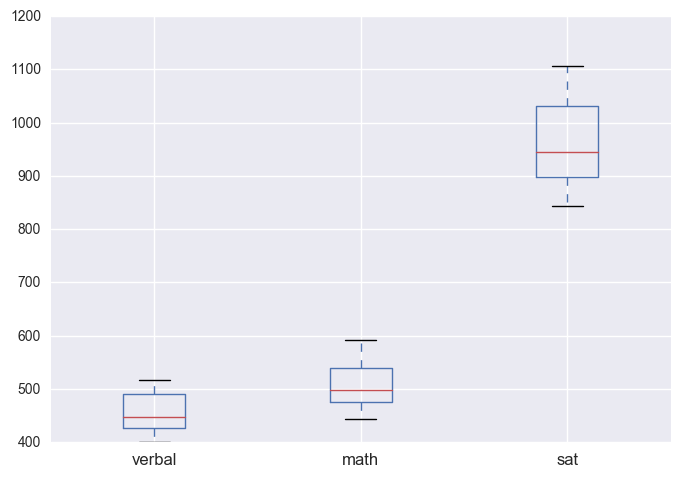

In [4]:
sat.boxplot(column = ['verbal', 'math', 'sat'], return_type = 'dict')
plt.show()

Vemos que tienen valores más o menos similares y que parece que los valores para sat son la suma de los valores en math y verbal. Vamos también a compararlos mediante gráficas.

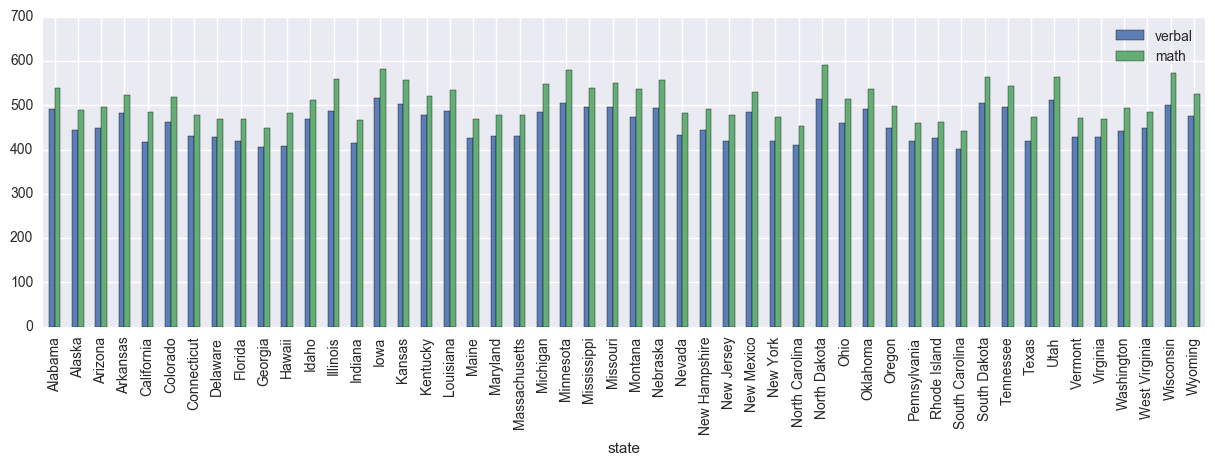

In [6]:
sat_state = sat.set_index('state')
sat_state[['verbal', 'math']].plot.bar(stacked=False, ylim = (0,700), alpha = 0.9, figsize=(15,4))

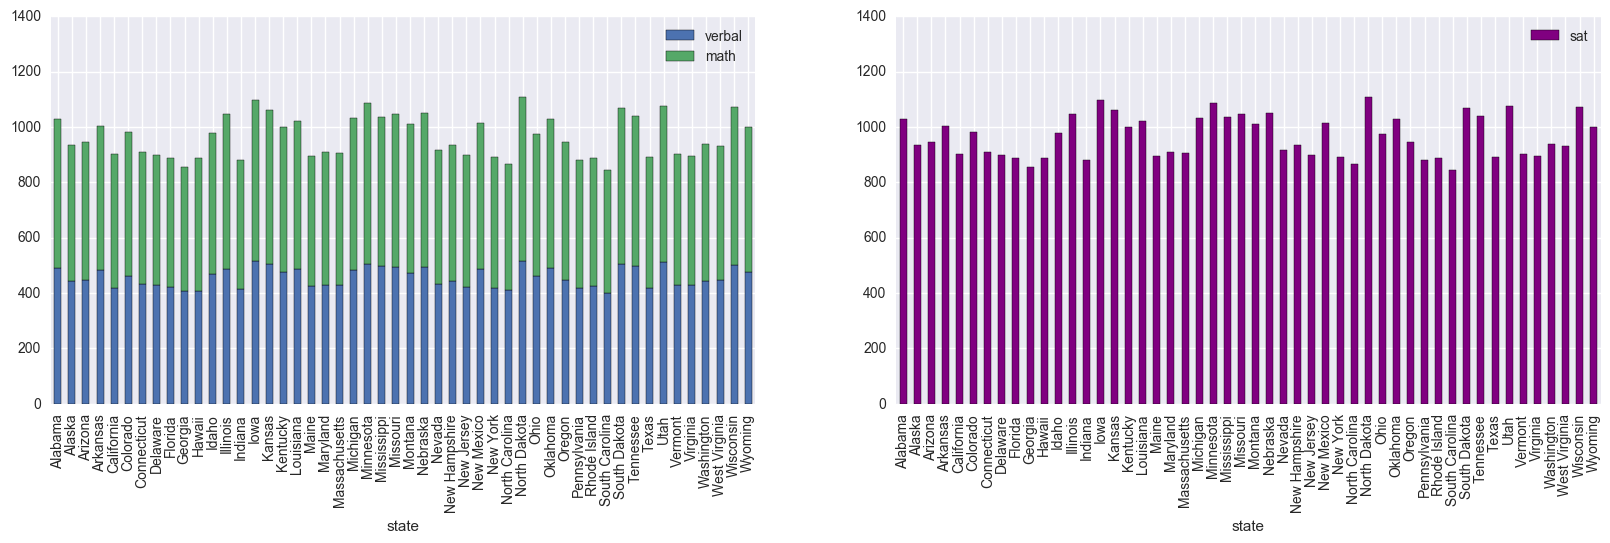

In [7]:
fig, axes = plt.subplots(1,2)
sat_state[['verbal', 'math']].plot.bar(stacked=True, ax = axes[0], ylim = (0,1400), figsize=(20,5))
sat_state[['sat']].plot.bar(color = 'purple', ax = axes[1], ylim = (0,1400), figsize=(20,5))

Podemos concluir que las variables de score 'math' y 'verbal' **usan la misma escala** y que para cada estado, la puntuación media en la prueba global 'sat' es la **suma de las puntuaciones medias** de sus componentes 'math' y 'verbal'.

Vamos a obtener los cinco estados con mayor y los cinco estados con menor gasto por alumno. Mostramos también su puntuación media en la prueba global.

In [8]:
#Estados que mas gastan por alumno
states_max_expend = sat_state.sort_values('expend', ascending = False).head(5)[['expend', 'sat']]
#Estados que menos gastan por alumno
states_min_expend = sat_state.sort_values('expend').head(5)[['expend', 'sat']]
print states_max_expend
print "----------------------------"
print states_min_expend

              expend  sat
state                    
New Jersey     9.774  898
New York       9.623  892
Alaska         8.963  934
Connecticut    8.817  908
Rhode Island   7.469  888
----------------------------
             expend   sat
state                    
Utah          3.656  1076
Mississippi   4.080  1036
Idaho         4.210   979
Tennessee     4.388  1040
Alabama       4.405  1029


New Yersey casi triplica en gasto a Utah. Vamos a representar gráficamente el gasto de los estados ordenados en forma creciente.

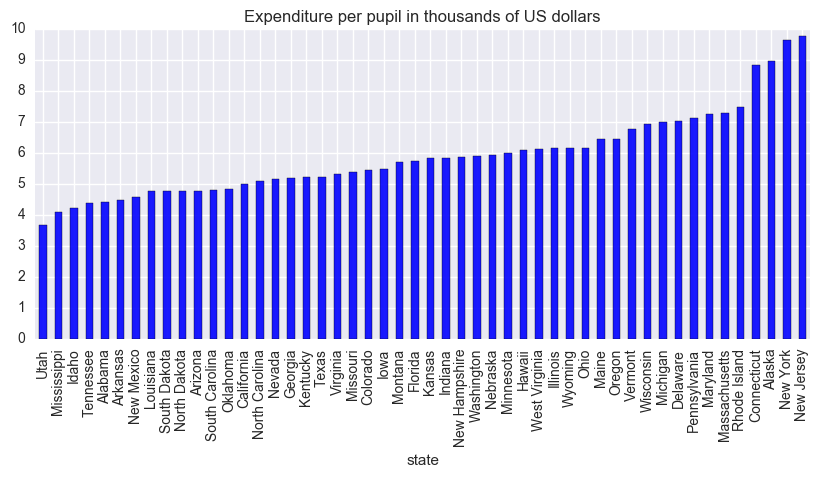

In [9]:
sat_state[['expend']].sort_values('expend').plot.bar(color = 'b', 
                                                     title = "Expenditure per pupil in thousands of US dollars",
                                                     alpha = 0.9,
                                                     yticks = range(11),
                                                     legend = False, 
                                                     figsize=(10,4))

Ahora vamos a ver los cinco estados con mayor y los cinco estados con menor ratio de alumnos por profesor.

In [10]:
#Estados con mayor ratio de alumnos por profesor
states_max_ratio = sat_state.sort_values('ratio', ascending = False).head(5)[['ratio', 'sat']]
#Estados con menor ratio de alumnos por profesor
states_min_ratio = sat_state.sort_values('ratio').head(5)[['ratio', 'sat']]
print states_max_ratio
print "--------------------------"
print states_min_ratio

            ratio   sat
state                  
Utah         24.3  1076
California   24.0   902
Washington   20.2   937
Michigan     20.1  1033
Oregon       19.9   947
--------------------------
              ratio   sat
state                    
Vermont        13.8   901
New Jersey     13.8   898
Maine          13.8   896
South Dakota   14.4  1068
Connecticut    14.4   908


Hay casi 10 alumnos más de media en Utah y California que en Vermont, New Yersey o Maine. Representamos el ratio medio de alumnos por profesor de los estados en orden creciente.

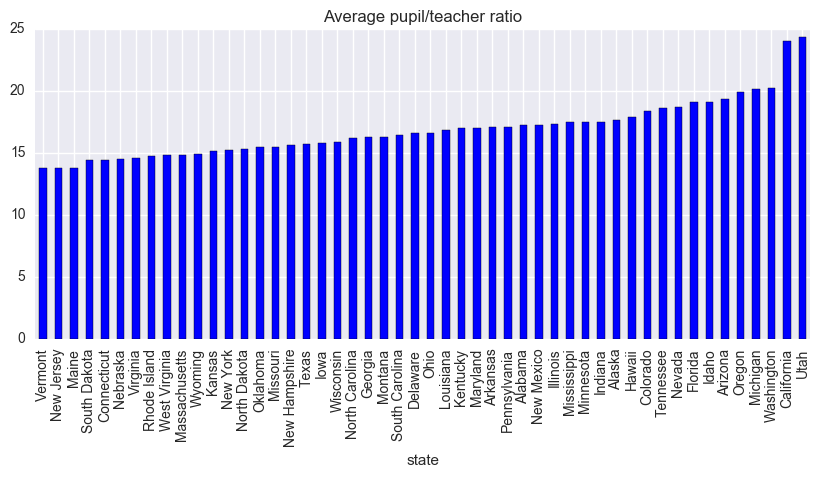

In [11]:
sat_state[['ratio']].sort_values('ratio').plot.bar(color = 'b', 
                                                     title = "Average pupil/teacher ratio",
                                                     legend = False, 
                                                     figsize=(10,4))

Vamos a obtener también los cinco estados con mayor y los cinco estados con menor salario medio anual para profesores.

In [12]:
#Estados con mayor salario medio anual para profesores
states_max_salary = sat_state.sort_values('salary', ascending = False).head(5)[['salary', 'sat']]
#Estados con menor salario medio anual para profesores
states_min_salary = sat_state.sort_values('salary').head(5)[['salary', 'sat']]
print states_max_salary
print "--------------------------"
print states_min_salary

              salary  sat
state                    
Connecticut   50.045  908
Alaska        47.951  934
New York      47.612  892
New Jersey    46.087  898
Pennsylvania  44.510  880
--------------------------
              salary   sat
state                     
South Dakota  25.994  1068
North Dakota  26.327  1107
Louisiana     26.461  1021
Mississippi   26.818  1036
Oklahoma      28.172  1027


El salario medio de los profesores de Connecticut es casi el doble que el de los profesores de South Dakota. Representamos gráficamente el salario medio anual de los profesores para cada estado en orden creciente. 

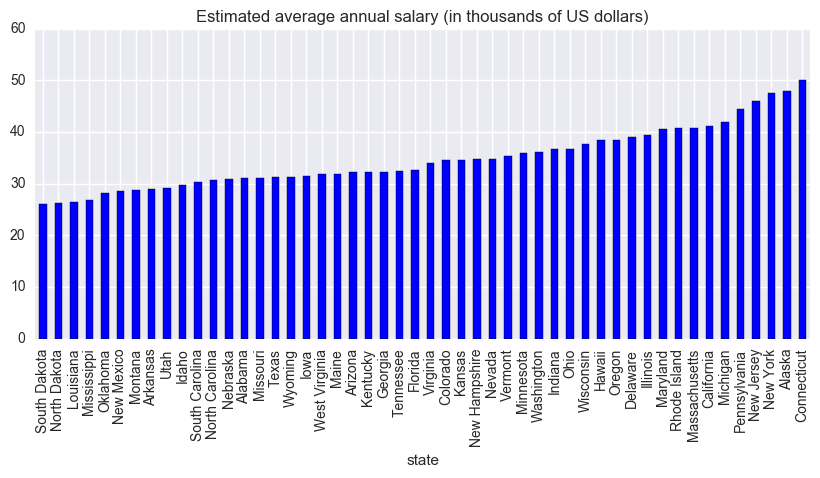

In [13]:
sat_state[['salary']].sort_values('salary').plot.bar(color = 'b', 
                                                     title = "Estimated average annual salary (in thousands of US dollars)",
                                                     legend = False, 
                                                     figsize=(10,4))

Ahora obtenemos los cinco estados con mayor y los cinco estados con peor puntuación en 'verbal'

In [14]:
#Estados con mejor puntuacion en verbal
states_best_verbal = sat_state.sort_values('verbal', ascending = False).head(5)[['verbal']]
#Estados con peor puntuacion en verbal
states_worst_verbal = sat_state.sort_values('verbal').head(5)[['verbal']]
print states_best_verbal
print "------------------"
print states_worst_verbal

              verbal
state               
Iowa             516
North Dakota     515
Utah             513
Minnesota        506
South Dakota     505
------------------
                verbal
state                 
South Carolina     401
Georgia            406
Hawaii             407
North Carolina     411
Indiana            415


La diferencia entre el mejor y el peor es de más de 100 puntos. Representamos gráficamente la puntuación media en la prueba 'verbal' para cada estado.

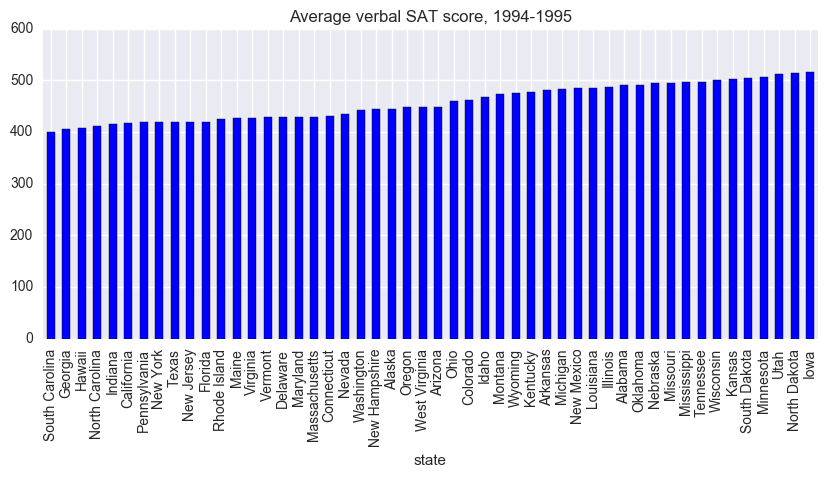

In [15]:
sat_state[['verbal']].sort_values('verbal').plot.bar(color = 'b', 
                                                     title = "Average verbal SAT score, 1994-1995",
                                                     legend = False, 
                                                     figsize=(10,4))

Ahora obtenemos los cinco estados con mayor y los cinco estados con peor puntuación en 'math'.

In [16]:
#Estados con mejor puntuacion en math
states_best_math = sat_state.sort_values('math', ascending = False).head(5)[['math']]
#Estados con peor puntuación en math
states_worst_math = sat_state.sort_values('math').head(5)[['math']]
print states_best_math
print "-----------------"
print states_worst_math

              math
state             
North Dakota   592
Iowa           583
Minnesota      579
Wisconsin      572
Utah           563
-----------------
                math
state               
South Carolina   443
Georgia          448
North Carolina   454
Pennsylvania     461
Rhode Island     463


En este caso también la diferencia entre el mejor y el peor es de más de 100 puntos. Representamos gráficamente la puntuación media en la prueba 'math' para cada estado.

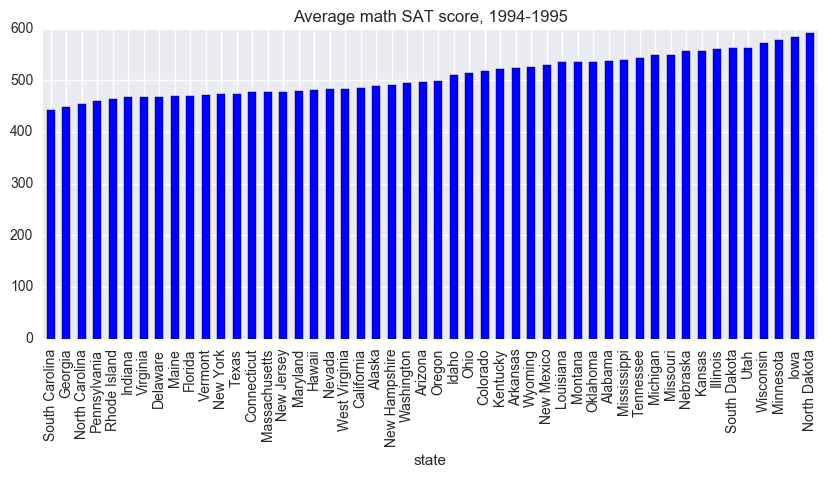

In [18]:
sat_state[['math']].sort_values('math').plot.bar(color = 'b', 
                                                 title = "Average math SAT score, 1994-1995",
                                                 legend = False, 
                                                 figsize=(10,4))

Por último, obtenemos los cinco estados con mayor y los cinco estados con peor puntuación en el global 'sat'.

In [19]:
#Estados con mejor puntuacion en total
states_best_sat = sat_state.sort_values('sat', ascending = False).head(5)[['sat']]
#Estados con peor puntuacion en total
states_worst_sat = sat_state.sort_values('sat').head(5)[['sat']]
print states_best_sat
print "----------------"
print states_worst_sat

               sat
state             
North Dakota  1107
Iowa          1099
Minnesota     1085
Utah          1076
Wisconsin     1073
----------------
                sat
state              
South Carolina  844
Georgia         854
North Carolina  865
Pennsylvania    880
Indiana         882


Lógicamente, la diferencia entre el mejor estado y el peor es de más de 100 puntos. Representamos gráficamente la puntuación media en la prueba total 'sat' para cada estado.

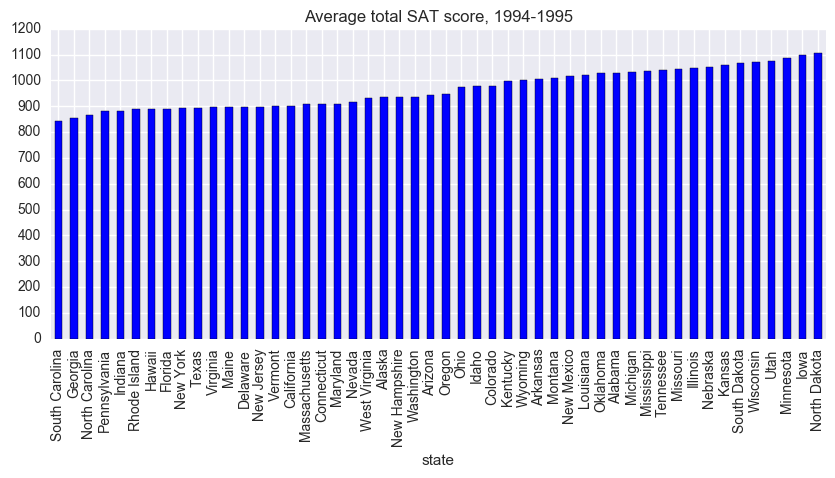

In [21]:
sat_state[['sat']].sort_values('sat').plot.bar(color = 'b', 
                                               title = "Average total SAT score, 1994-1995",
                                               yticks = range(0,1300,100),
                                               legend = False, 
                                               figsize=(10,4))

Resulta interesante el caso del estado de Utah, pues es el que menos gasta de media por alumno y el que tiene un ratio más elevado de alumnos por profesor y, sin embargo, está en entre los cinco mejores en resultados. También cabe destacar que ninguno de los estados que invierten más en educación (New Yersey, Connecticut,...) aparecen entre los mejores en cuanto a resultado.

**Análisis gráfico (mediante scatterplot) de la relación entre las variables que indican resultado y las que indican gasto.**
Sólo vamos a considerar la variable de la prueba total 'sat', pues hemos comprobado que, para cada estado,  es la suma de los valores de las variables 'verbal' y 'math', por lo que las tres variables dan lugar a la misma representación.

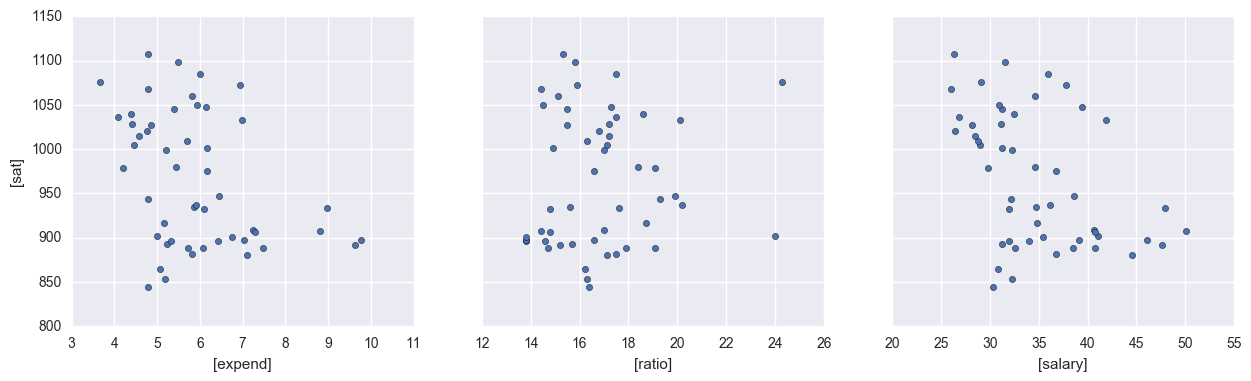

In [22]:
fig, axes = plt.subplots(1,3)
sat.plot(['expend'], ['sat'], kind = 'scatter', ax = axes[0], sharey = True, figsize = (15,4))
sat.plot(['ratio'], ['sat'], kind = 'scatter', ax = axes[1], sharey = True, figsize = (15,4))
sat.plot(['salary'], ['sat'], kind = 'scatter', ax = axes[2], sharey = True, figsize = (15,4))

No se aprecia relación lineal entre las variables que indican gasto y resultados. Lo que sí resulta interesante es que la relación **parece ser inversa.** Los estados con mayor gasto medio por alumno y con salarios medios más altos para los profesores obtienen peores resultados que otros estados que invierten menos.

### Vamos a analizar si existe relación entre las variables relacionadas con el gasto y los resultados de la prueba.

Vamos a obtener las medidas estadísticas de correlación y covarianza entre las variables relacionadas con el gasto y los resultados en la prueba.

In [23]:
sat.corr().loc['expend':'salary','verbal':'sat']

,verbal,math,sat
expend,-0.410050,-0.349414,-0.380537
ratio,0.063767,0.095422,0.081254
salary,-0.476964,-0.401313,-0.439883


In [24]:
sat.cov().loc['expend':'salary','verbal':'sat']

,verbal,math,sat
expend,-19.656976,-19.144840,-38.801816
ratio,5.083551,8.694653,13.778204
salary,-99.680458,-95.860365,-195.540823


Usamos el modelo de regresión lineal **linear_model de sklearn** que usa el método de los mínimos cuadrados.

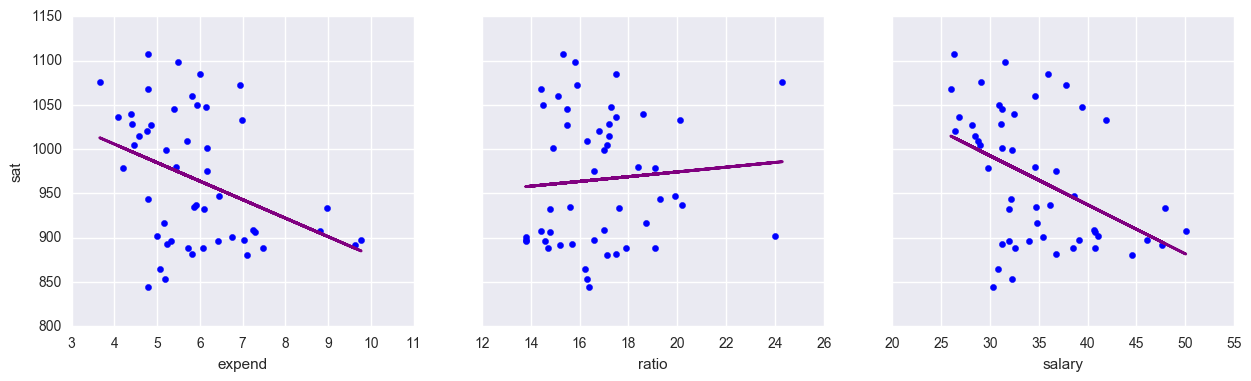

In [25]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

expend = sat["expend"]
ratio = sat["ratio"]
salary = sat["salary"]
X1 = expend[:, np.newaxis]
X2 = ratio[:, np.newaxis]
X3 = salary[:, np.newaxis]
y = sat["sat"]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,4))

ax1.scatter(X1, y, color='blue')
ax2.scatter(X2, y, color='blue')
ax3.scatter(X3, y, color='blue')

clf.fit(X1, y)
ax1.plot(X1, clf.predict(X1), color='purple', linewidth=2)
ax1.set_xlabel("expend")
ax1.set_ylabel("sat")

clf.fit(X2, y)
ax2.plot(X2, clf.predict(X2), color='purple', linewidth=2)
ax2.set_xlabel("ratio")

clf.fit(X3, y)
ax3.plot(X3, clf.predict(X3), color='purple', linewidth=2)
ax3.set_xlabel("salary")

Vamos a ver las tres gráficas por separado usando **regplot de seaborn.**

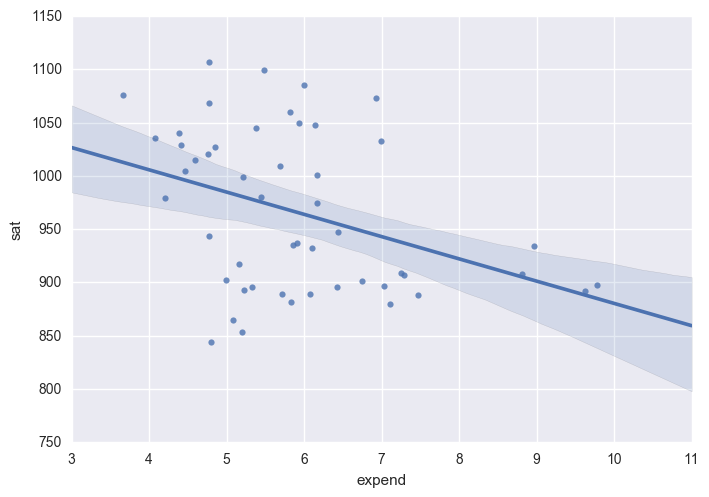

In [26]:
sns.regplot("expend", "sat", data = sat)

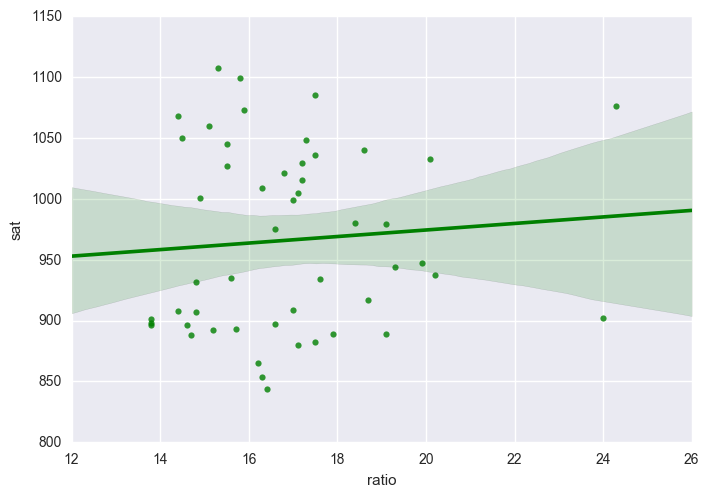

In [27]:
sns.regplot("ratio", "sat", data = sat, color = 'g')

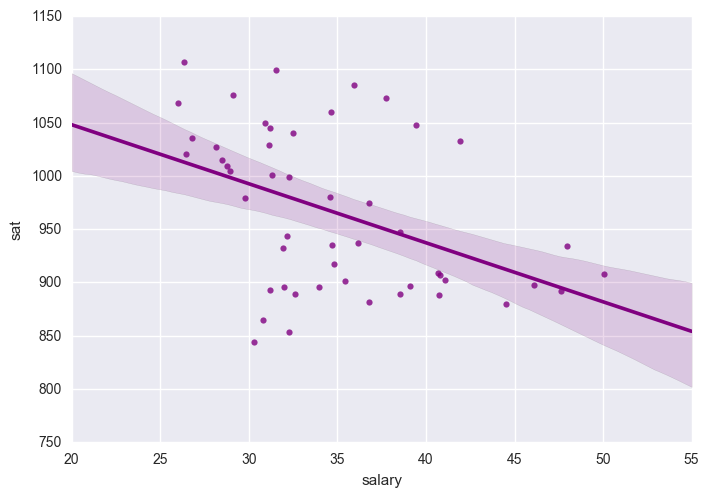

In [28]:
sns.regplot("salary", "sat", data = sat, color = 'purple')

Podemos ver pues que no hay relación lineal entre las variables relacionadas con el gasto y las de resultados. Lo que sí que se aprecia es que para tanto expend como salary, la relación es inversa y, que a mayor gasto peor resultado.

### **Vamos a utilizar la variable frac para dividir a los estados en grupos**

In [81]:
sat.sort_values('frac')

,state,expend,ratio,salary,frac,verbal,math,sat
44,Utah,3.656,24.3,29.082,4,513,563,1076
24,Mississippi,4.080,17.5,26.818,4,496,540,1036
41,South Dakota,4.775,14.4,25.994,5,505,563,1068
34,North Dakota,4.775,15.3,26.327,5,515,592,1107
15,Iowa,5.483,15.8,31.511,5,516,583,1099
4,Arkansas,4.459,17.1,28.934,6,482,523,1005
1,Alabama,4.405,17.2,31.144,8,491,538,1029
36,Oklahoma,4.845,15.5,28.172,9,491,536,1027
27,Nebraska,5.935,14.5,30.922,9,494,556,1050
49,Wisconsin,6.930,15.9,37.746,9,501,572,1073


Vamos a tomar **tres grupos: frac < 30, 30 <= frac < 70 y frac >= 70**

Calculamos correlaciones y covarianzas entre las variables relacionadas con el gasto y los resultados para cada grupo.

Empezamos con **frac < 30**

In [191]:
sat[sat["frac"]<30].corr().loc['expend':'salary','verbal':'sat']

,verbal,math,sat
expend,-0.161247,0.103097,-0.007800
ratio,-0.034240,-0.084468,-0.064558
salary,-0.171210,0.044017,-0.046990


In [192]:
sat[sat["frac"]<30].cov().loc['expend':'salary','verbal':'sat']

,verbal,math,sat
expend,-2.683197,2.378865,-0.304332
ratio,-1.388000,-4.748000,-6.136000
salary,-13.392720,4.774400,-8.618320


Continuamos con **30 <= frac < 70**

In [240]:
sat[np.all([(sat["frac"]<70).values,(sat["frac"]>=30).values],axis=0)].corr().loc['expend':'salary','verbal':'sat']

,verbal,math,sat
expend,0.609283,0.442492,0.552798
ratio,0.156942,0.527812,0.372398
salary,0.527736,0.652656,0.628535


In [241]:
sat[np.all([(sat["frac"]<70).values,(sat["frac"]>=30).values],axis=0)].cov().loc['expend':'salary','verbal':'sat']

,verbal,math,sat
expend,8.997643,7.211099,16.208743
ratio,5.533088,20.534926,26.068015
salary,33.868949,46.222710,80.091658


Por último, **frac >= 70**

In [242]:
sat[sat["frac"]>=70].corr().loc['expend':'salary','verbal':'sat']

,verbal,math,sat
expend,-0.664297,-0.149709,-0.419598
ratio,-0.036750,-0.333645,-0.206130
salary,-0.657475,-0.364893,-0.537128


In [243]:
sat[sat["frac"]>=70].cov().loc['expend':'salary','verbal':'sat']

,verbal,math,sat
expend,-8.748143,-2.195048,-10.943190
ratio,-0.352381,-3.561905,-3.914286
salary,-30.789714,-19.025405,-49.815119


Representamos el modelo de regresión lineal de la relación entre la variable 'expend' y el resultado de la prueba total para cada unos de los grupos de elegibilidad.

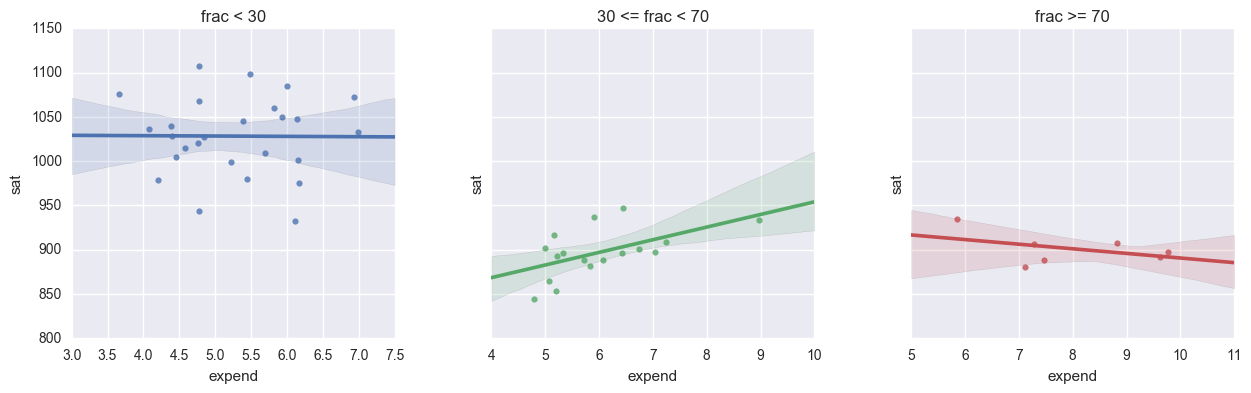

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize =(15,4))
sns.regplot("expend", "sat", data = sat[sat["frac"]<30], ax = ax1)
ax1.set_title("frac < 30")
sns.regplot("expend", "sat", data = sat[np.all([(sat["frac"]<70).values,(sat["frac"]>=30).values],axis=0)], ax = ax2)
ax2.set_title("30 <= frac < 70")
sns.regplot("expend", "sat", data = sat[sat["frac"]>=70], ax = ax3)
ax3.set_title("frac >= 70")
plt. subplots_adjust(wspace=0.3)

Representamos el modelo de regresión lineal de la relación entre la variable 'ratio' y el resultado de la prueba total para cada unos de los grupos de elegibilidad.

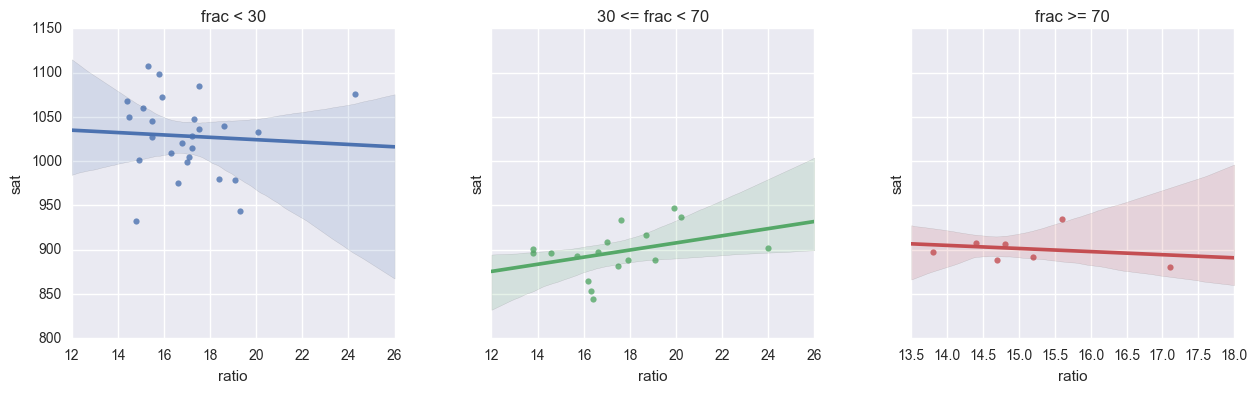

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize =(15,4))
sns.regplot("ratio", "sat", data = sat[sat["frac"]<30], ax = ax1)
ax1.set_title("frac < 30")
sns.regplot("ratio", "sat", data = sat[np.all([(sat["frac"]<70).values,(sat["frac"]>=30).values],axis=0)], ax = ax2)
ax2.set_title("30 <= frac < 70")
sns.regplot("ratio", "sat", data = sat[sat["frac"]>=70], ax = ax3)
ax3.set_title("frac >= 70")
plt. subplots_adjust(wspace=0.3)

Representamos el modelo de regresión lineal de la relación entre la variable 'salary' y el resultado de la prueba total para cada unos de los grupos de elegibilidad.

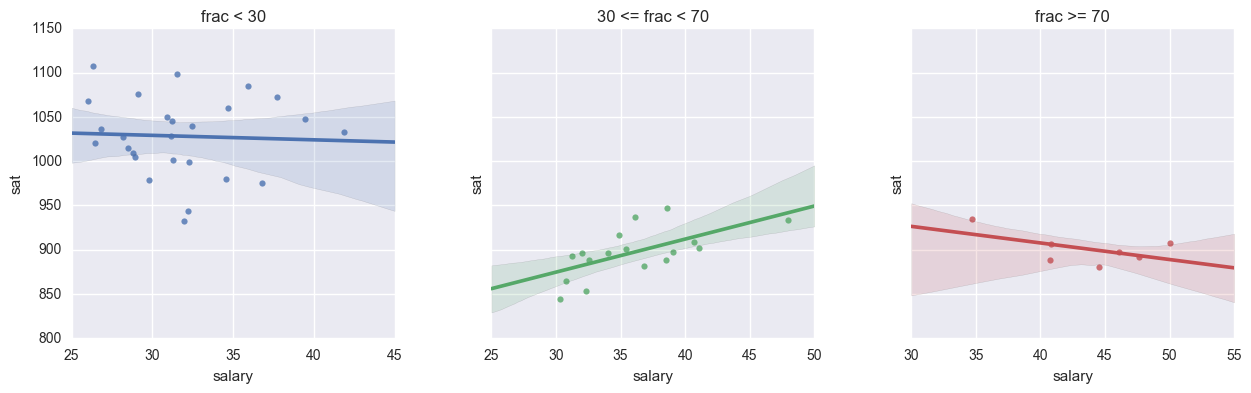

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize =(15,4))
sns.regplot("salary", "sat", data = sat[sat["frac"]<30], ax = ax1)
ax1.set_title("frac < 30")
sns.regplot("salary", "sat", data = sat[np.all([(sat["frac"]<70).values,(sat["frac"]>=30).values],axis=0)], ax = ax2)
ax2.set_title("30 <= frac < 70")
sns.regplot("salary", "sat", data = sat[sat["frac"]>=70], ax = ax3)
ax3.set_title("frac >= 70")
plt. subplots_adjust(wspace=0.3)

A partir de estos resultados no podemos decir que exista relación lineal entre la inversión en educación y los resultados de la prueba sat. Cabe destacar que los estados donde se presentan el menor porcentaje de alumnos son los que obtienen mejor resultado y los que invierten poco en educación, Además, son los estados en los que se aprecia menos correlación entre las variables que indican gasto y las que indican resultado. Esto puede deberse a que los pocos alumnos que se presentan lo hacen por un motivo concreto y se preparan mejor para la prueba. Los estados donde se presentan el porcentaje más elevado de alumnos tiene resultados mediocres en comparación con la elevada inversión que tienen. Quizás también estos estados con elevada inversión hacen más esfuerzos para que el mayor número de alumnos posibles se presenten a la prueba, lo que al final lleva que tanto "buenos" como "malos" alumnos hagan el examen y esto haga bajar la media.